# Cyclic valued data, i.e. $\mathbb{S}_1$, on grid-graph, i.e. $\mathbb{S}_1$-image

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [76]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec
import scipy
import time
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
from matplotlib import cm
import condat_tv
import imp
import relaxed_tikhonov_sphere_image

lam = 10     #regularization parameter
iter = 250  #number of iterations
tau = 0.1   #parameter of the algorithm, >0
rho = 1     #parameter of the algorithm, in [1,2)

In [77]:
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [27]:
Noise, Data = relaxed_tikhonov_sphere_image.sample_vMF_image(10,2,20)

In [74]:
Data, Noise = relaxed_tikhonov_sphere_image.sample_toy_data_diag(100,10)

In [8]:
from matplotlib import image
from PIL import Image
import cv2

img = cv2.imread('orig_corals.jpg')

imgsmall = cv2.resize(img.copy(), (200,200), interpolation =cv2.INTER_AREA)

imgconv = cv2.cvtColor(imgsmall.copy(), cv2.COLOR_BGR2HSV)

imgsmallconv = cv2.cvtColor(imgsmall.copy(), cv2.COLOR_BGR2RGB)

In [10]:
Dataimag = imgconv[:,:,0]/180*2*np.pi

Dataimag = np.array([np.cos(Dataimag), np.sin(Dataimag)])

Noiseimag = relaxed_tikhonov_sphere_image.sample_vMF_noise_image(Dataimag, 10)

In [11]:
noiseimag = imgconv.copy()
noiseimag[:,:,0] = np.mod(np.angle(Noiseimag[0,:,:] + 1j*Noiseimag[1,:,:]), 2*np.pi)/2/np.pi*180

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- ADMM : solving the complex-valued S_1-model proposed by Condat ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem ## code and main algorithm

- ADMM_TV_BOX : solving the rely TV problem

In [69]:
q, qn, qdata, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noise, Data, 3*iter+1, 1, 3*rho, 3)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
--------------------------------------------------------------------------
0 		|   2.111e+04 	|   1.402e+03 		|  9.577e-01
100 		|   4.957e+02 	|   3.993e+02 		|  1.298e-03
200 		|   4.955e+02 	|   3.989e+02 		|  9.579e-04
300 		|   4.956e+02 	|   3.989e+02 		|  9.406e-04
400 		|   4.956e+02 	|   3.989e+02 		|  9.330e-04
500 		|   4.956e+02 	|   3.989e+02 		|  9.281e-04
600 		|   4.956e+02 	|   3.989e+02 		|  9.242e-04
700 		|   4.956e+02 	|   3.989e+02 		|  9.211e-04
finale 		|  4.965e+02 				|  sphered
719 495.6070384012126 293.4668118953705


In [70]:
print('RMSE(Solution) \t=', "%10.3e"%(np.sum(np.sqrt(np.sum((q - Data)**2,0)))/90/90), ' \t\t| RMSE(Noise) \t=', "%10.3e"%(np.sum(np.sqrt(np.sum((Noise - Data)**2,0)))/90/90)) 
print('MAE(Solution) \t=', "%10.3e"%(np.sum(np.abs(q - Data)/90/90)), ' \t\t| MAE(Noise) \t=', "%10.3e"%(np.sum(np.abs(Noise - Data)/90/90))) 
print('cMSE(Solution) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/90/90), ' \t\t| cMSE(Noise) \t=', "%10.3e"%(np.sum(np.arccos(np.sum(Noise*Data,0))**2)/90/90)) 

RMSE(Solution) 	=  9.014e-02  		| RMSE(Noise) 	=  1.788e-01
MAE(Solution) 	=  1.149e-01  		| MAE(Noise) 	=  2.285e-01
cMSE(Solution) 	=  1.794e-02  		| cMSE(Noise) 	=  5.079e-02


In [61]:
lamr = 10

q2, q1data = relaxed_tikhonov_sphere_image.baseline(Noise, Data, 1, 10*300, 0)

24120.0
iteration 	| func-value 	| original-cost 	| solution is
-------------------------------------------------------------------
0 		|   2.304e+04 	|   2.306e+04 		| unsphered
50 		|   3.407e+03 	|   3.325e+03 		| unsphered
100 		|   3.340e+03 	|   3.258e+03 		| unsphered
150 		|   3.340e+03 	|   3.258e+03 		| unsphered
200 		|   3.340e+03 	|   3.258e+03 		| unsphered
250 		|   3.340e+03 	|   3.258e+03 		| unsphered
300 		|   3.340e+03 	|   3.258e+03 		| unsphered
350 		|   3.340e+03 	|   3.258e+03 		| unsphered
400 		|   3.340e+03 	|   3.258e+03 		| unsphered
450 		|   3.340e+03 	|   3.258e+03 		| unsphered
500 		|   3.340e+03 	|   3.258e+03 		| unsphered
550 		|   3.340e+03 	|   3.258e+03 		| unsphered
600 		|   3.340e+03 	|   3.258e+03 		| unsphered
650 		|   3.340e+03 	|   3.258e+03 		| unsphered
700 		|   3.340e+03 	|   3.258e+03 		| unsphered
750 		|   3.340e+03 	|   3.258e+03 		| unsphered
800 		|   3.340e+03 	|   3.258e+03 		| unsphered
850 		|   3.340e+03 	|   3.258e+03 		|

In [71]:
qq, qqdata, qqres1, qqres2, qqtime = relaxed_tikhonov_sphere_image.ADMM_S1(Noise[0,:,:] + 1j*Noise[1,:,:], Data[0,:,:] + 1j*Data[1,:,:], 3*iter, 1, 3*rho, 3)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
------------------------------------------------------------------------
0 		|   2.111e+04 	|   1.402e+03 		|   9.577e-01
100 		|   4.960e+02 	|   3.998e+02 		|   1.581e-03
200 		|   4.956e+02 	|   3.989e+02 		|   9.698e-04
300 		|   4.956e+02 	|   3.989e+02 		|   9.353e-04
400 		|   4.956e+02 	|   3.989e+02 		|   9.278e-04
500 		|   4.956e+02 	|   3.989e+02 		|   9.234e-04
600 		|   4.956e+02 	|   3.989e+02 		|   9.202e-04
700 		|   4.956e+02 	|   3.989e+02 		|   9.176e-04
finale   4.965e+02 			|  sphered
727 495.6160060317239 339.74901509284973


In [72]:
q1, q1data, q1res1, q1res2, q1time = relaxed_tikhonov_sphere_image.PMM_S1_2D(Noise[0,:,:] + 1j*Noise[1,:,:], Data[0,:,:] + 1j*Data[1,:,:], 1, 3*iter+1, tau, 0, 3)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
----------------------------------------------------------------------
0 		|   2.171e+04 	|   1.402e+03 		|   9.000e-01
100 		|   4.887e+02 	|   3.992e+02 		|   1.392e-03
200 		|   4.954e+02 	|   3.989e+02 		|   1.049e-03
300 		|   4.954e+02 	|   3.989e+02 		|   9.997e-04
400 		|   4.955e+02 	|   3.989e+02 		|   9.820e-04
500 		|   4.955e+02 	|   3.989e+02 		|   9.712e-04
600 		|   4.955e+02 	|   3.989e+02 		|   9.630e-04
700 		|   4.955e+02 	|   3.989e+02 		|   9.573e-04
finale  		|  4.965e+02 			| sphered
736 495.53711490328317 310.0705201625824


In [78]:
q, qz = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noise, Data, 0.4, 100, 1000)

iter. 	| funv-value 	| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  	|   9.828e+03  	|   9.816e-01  	|   9.286e-01  	|   9.907e+01
100  	|   1.260e+03  	|   6.596e-03  	|   9.278e-01  	|   6.707e+00
200  	|   1.304e+03  	|   2.172e-03  	|   5.731e-03  	|   7.964e-01
300  	|   1.304e+03  	|   2.109e-03  	|   2.933e-03  	|   5.512e-01
400  	|   1.305e+03  	|   2.086e-03  	|   1.581e-03  	|   3.694e-01
500  	|   1.305e+03  	|   2.073e-03  	|   1.568e-03  	|   2.143e-01
600  	|   1.305e+03  	|   2.069e-03  	|   1.565e-03  	|   5.885e-02
700  	|   1.305e+03  	|   2.069e-03  	|   9.303e-05  	|   3.152e-03
800  	|   1.305e+03  	|   2.069e-03  	|   6.923e-05  	|   3.153e-03
900  	|   1.305e+03  	|   2.070e-03  	|   5.297e-05  	|   3.154e-03
1000  	|   1.305e+03  	|   2.070e-03  	|   4.103e-05  	|   3.154e-03
1100  	|   1.305e+03  	|   2.071e-03  	|   3.203e-05  	|   3.154e-03
1200  	|   1.305e+03  	|   2.071e-03  	|   2

In [ ]:
q_angle = relaxed_tikhonov_sphere_image.CPPA2D(np.angle(Noise[0,:,:] + 1j*Noise[1,:,:]), np.angle(Data[0,:,:] + 1j*Data[1,:,:]), 0.3, 10)

iter. 	| funv-value 		| RMSE 		| error
---------------------------------------------------------------
100 	| 7023.195827086256 	|   6.91e-03  	|   6.28e+00
200 	| 7007.170969846764 	|   5.38e-03  	|   9.89e-03
300 	| 7002.1769880508555 	|   4.88e-03  	|   6.28e+00
400 	| 6999.555451828816 	|   4.62e-03  	|   6.28e+00
500 	| 6998.015666735049 	|   4.47e-03  	|   2.44e-03
600 	| 6997.012766679369 	|   4.37e-03  	|   1.84e-03
700 	| 6996.296845841157 	|   4.29e-03  	|   1.44e-03
800 	| 6995.757332397496 	|   4.24e-03  	|   1.15e-03
900 	| 6995.33536812841 	|   4.20e-03  	|   9.49e-04
1000 	| 6994.99321305 	|   4.17e-03  	|   7.99e-04
1100 	| 6994.703453160146 	|   4.14e-03  	|   6.81e-04
1200 	| 6994.462351005232 	|   4.12e-03  	|   5.92e-04
1300 	| 6994.253094978231 	|   4.11e-03  	|   5.20e-04
1400 	| 6994.06616037471 	|   4.09e-03  	|   4.61e-04


KeyboardInterrupt: 

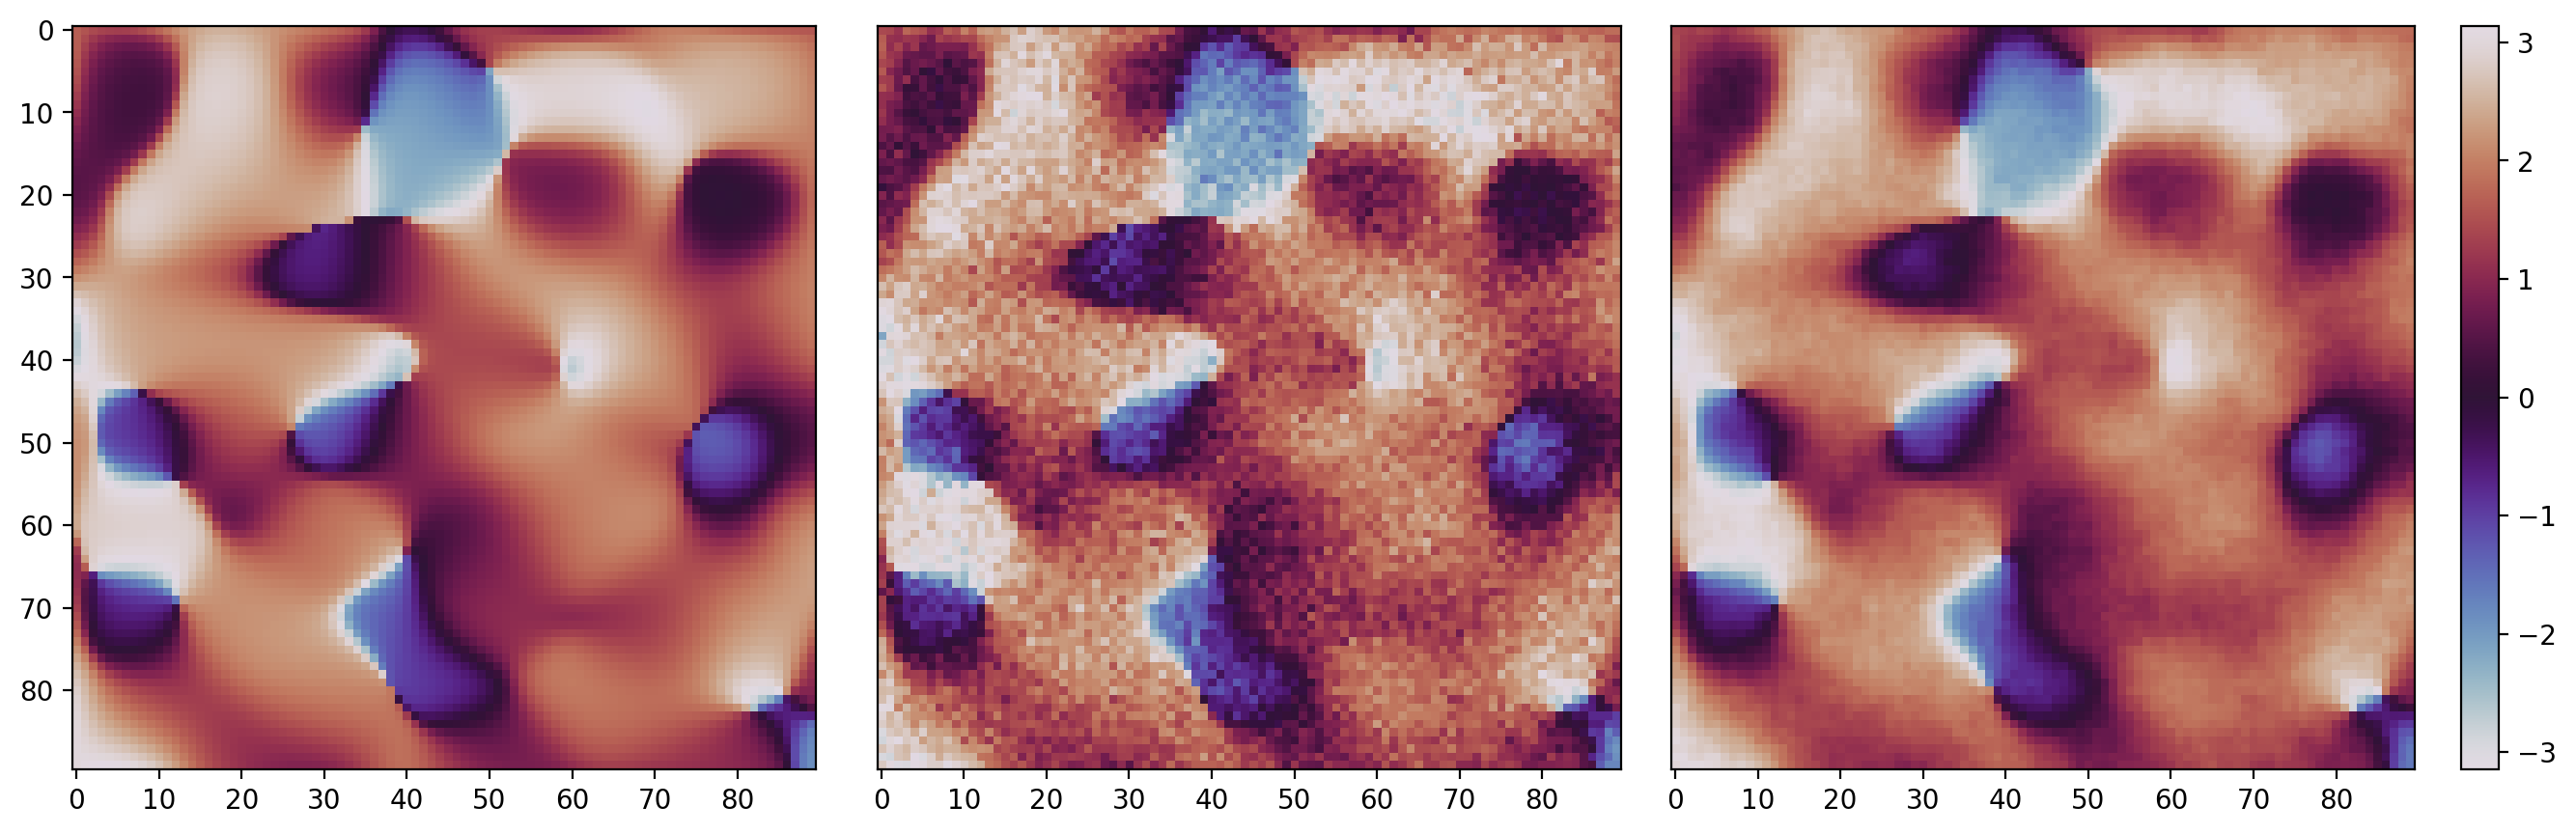

In [73]:
relaxed_tikhonov_sphere_image.plotS1_image(Noise, Data, qn)

# HSV example 

In [61]:
q, qn, qdata, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noiseimag, Dataimag, 4*iter+1, 2, 20*rho, 4)

iteration =  0 		| func-value =   1.910e+05 	| non-convex cost =   2.155e+04 	| spherical-error =   9.937e-01
iteration =  50 	| func-value =   2.856e+04 	| non-convex cost =   6.023e+03 	| spherical-error =   6.981e-01
iteration =  100 	| func-value =   1.822e+04 	| non-convex cost =   3.613e+03 	| spherical-error =   4.161e-01
iteration =  150 	| func-value =   8.362e+03 	| non-convex cost =   2.946e+03 	| spherical-error =   1.412e-01
iteration =  200 	| func-value =   4.040e+03 	| non-convex cost =   2.666e+03 	| spherical-error =   1.291e-02
iteration =  250 	| func-value =   3.860e+03 	| non-convex cost =   2.554e+03 	| spherical-error =   5.635e-03
iteration =  300 	| func-value =   3.809e+03 	| non-convex cost =   2.501e+03 	| spherical-error =   3.443e-03
iteration =  350 	| func-value =   3.791e+03 	| non-convex cost =   2.475e+03 	| spherical-error =   2.662e-03
iteration =  400 	| func-value =   3.784e+03 	| non-convex cost =   2.462e+03 	| spherical-error =   2.387e-03
ite

In [308]:
q_box_x, q_box_z = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noiseimag, Dataimag, 1000000000000, 100, 10000)

iter. 	| funv-value 		| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  	|  39985.56590867509  	|    4.00e+04  	|    6.05e-01  	|    1.99e+02
100  	|  45932.67711759335  	|    4.59e+04  	|    6.05e-01  	|    1.39e+02
200  	|  66514.45889468913  	|    6.64e+04  	|    6.05e-01  	|    7.84e+01
300  	|  101730.90861907012  	|    1.02e+05  	|    6.05e-01  	|    1.79e+01
400  	|  114985.45612984628  	|    1.15e+05  	|    0.00e+00  	|    1.10e-07
500  	|  114985.45612984628  	|    1.15e+05  	|    0.00e+00  	|    1.10e-07
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/jonasbresch/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_4180/757811078.py", line 1, in <module>
    q_box_x, q_box_z = ADMM_TV_BOX(Noiseimag, Dataimag, 1000000000000, 100, 10000)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_4180/2906466531.py", line 33, in ADMM_TV_BOX
    u = proj_B1(x + z)
        ^^^^^^^^^^^^^^
  File "/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_4180/3171110891.py", line -1, in proj_B1
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jonasbresch/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, i

In [240]:
q_tv_box = relaxed_tikhonov_sphere_image.Condat_TV_proj(Noiseimag, Dataimag, 0.125, 0.1, 0.0001, 10000)

In [64]:
denoiseimag = imgconv.copy()
denoiseimag[:,:,0] = np.mod(np.angle(q[0,:,:] + 1j*q[1,:,:]),2*np.pi)/2/np.pi*180
#denoiseimag[:,:,0] = np.mod(np.angle(q_tv_box[0,:,:] + 1j*q_tv_box[1,:,:]),2*np.pi)/2/np.pi*180

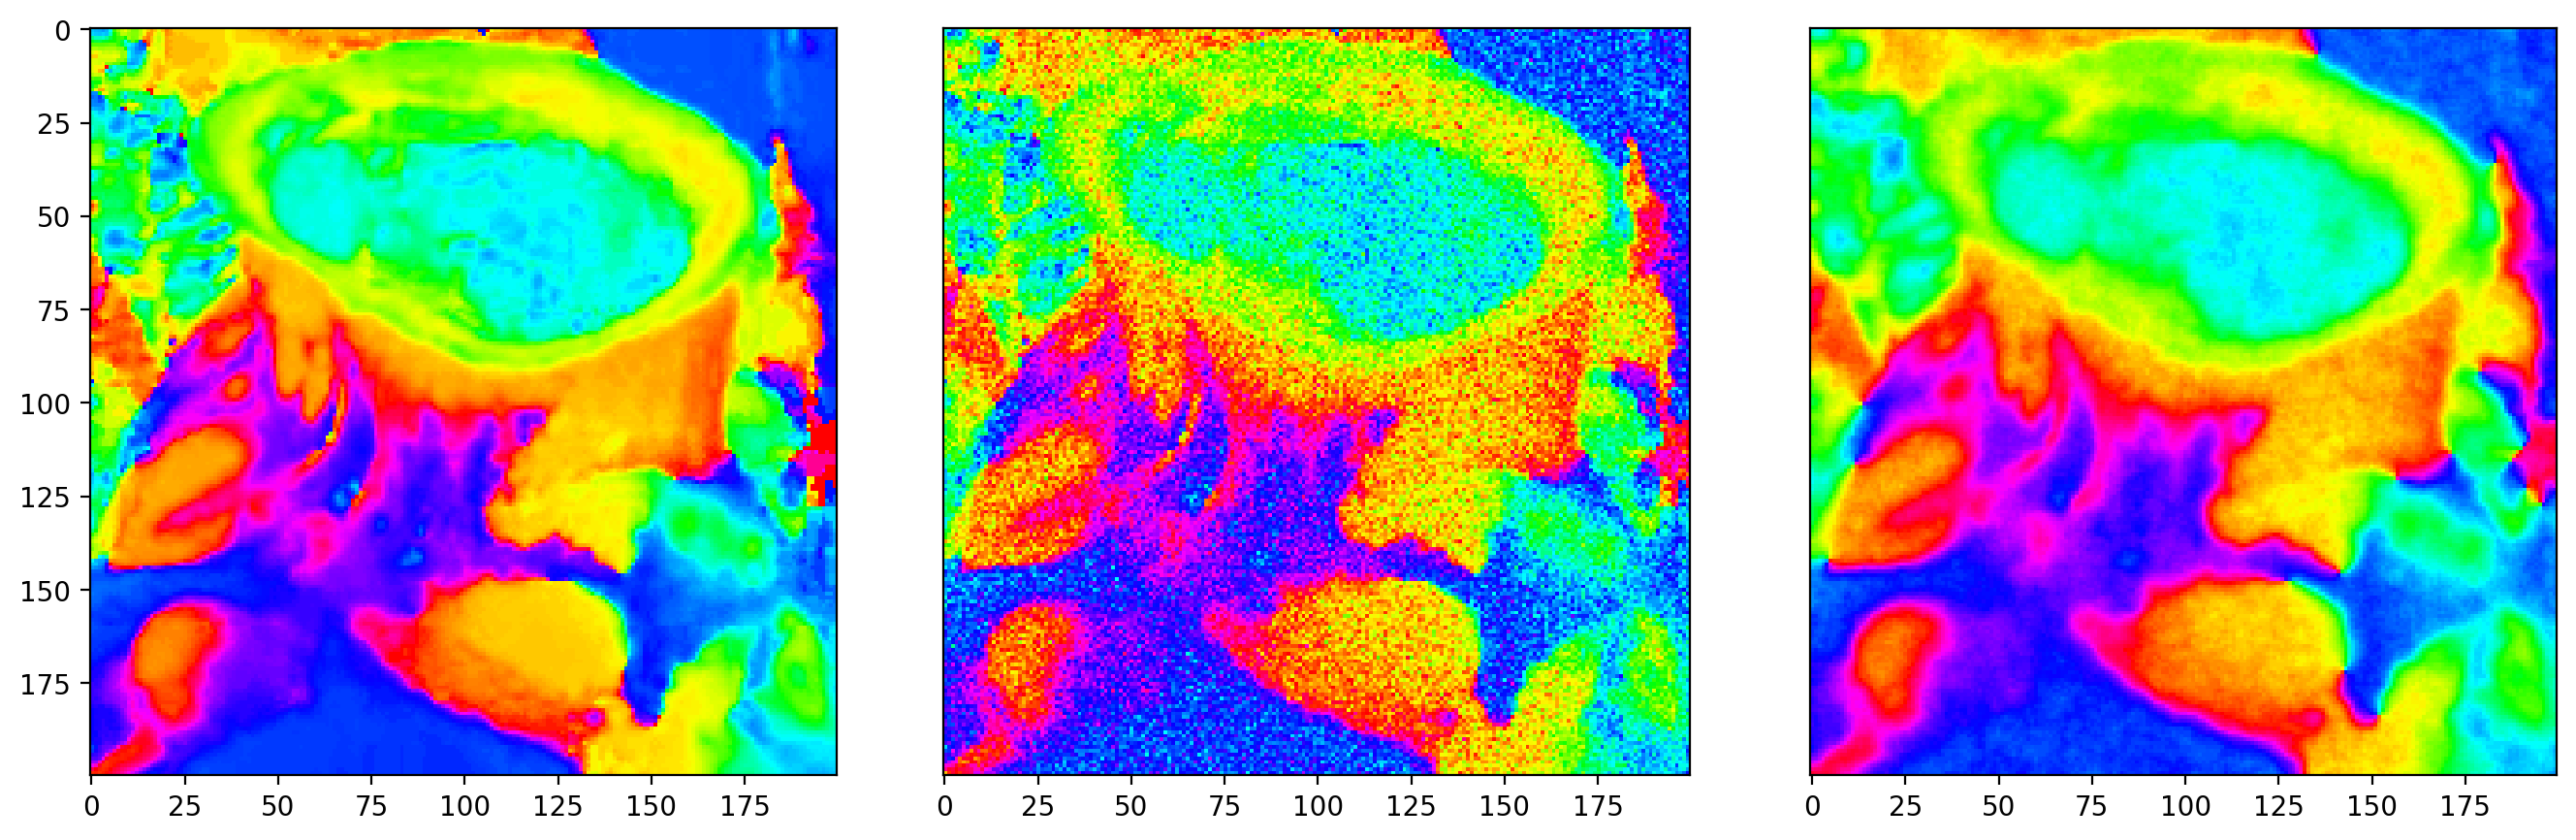

In [66]:
relaxed_tikhonov_sphere_image.plotS1_hsv_image(noiseimag, imgconv, denoiseimag)